<a href="https://colab.research.google.com/github/KiranGaikwad2020/Data_Science/blob/Dev/TitanicDatasetAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the Titanic dataset to understand the factors influencing survival. This includes loading the dataset, preprocessing 'Age' and 'Survived' columns, and then generating several visualizations: survival rate by gender, survival rate by passenger class, age distribution for survivors vs. non-survivors, and survival rate by both passenger class and gender. Finally, summarize the key insights derived from these visualizations regarding the relationships between passenger class, age, gender, and survival.

## Load Titanic Dataset

### Subtask:
Load the Titanic dataset into a pandas DataFrame.


**Reasoning**:
First, import the necessary libraries, pandas and seaborn. Then, load the 'titanic' dataset from seaborn into a pandas DataFrame named `df_titanic` as instructed.



In [1]:
import pandas as pd
import seaborn as sns

df_titanic = sns.load_dataset('titanic')
print("Titanic dataset loaded successfully. First 5 rows:")
print(df_titanic.head())

Titanic dataset loaded successfully. First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Preprocess Data

### Subtask:
Handle missing values in the 'Age' column (e.g., by imputation with the median or mean) and ensure the 'Survived' column is in a suitable numerical format for analysis (0 for deceased, 1 for survived).


**Reasoning**:
First, I need to understand the current state of the 'Age' and 'Survived' columns. This involves checking for any missing values in 'Age' and inspecting the data types and unique values of both columns to confirm their format.



In [2]:
print("Missing values in 'Age' column before imputation:")
print(df_titanic['age'].isnull().sum())

print("\nData type of 'Age' column:")
print(df_titanic['age'].dtype)

print("\nUnique values in 'Survived' column:")
print(df_titanic['survived'].unique())

print("\nData type of 'Survived' column:")
print(df_titanic['survived'].dtype)

Missing values in 'Age' column before imputation:
177

Data type of 'Age' column:
float64

Unique values in 'Survived' column:
[0 1]

Data type of 'Survived' column:
int64


**Reasoning**:
The previous step confirmed missing values in the 'Age' column and the appropriate data types for both 'Age' and 'Survived'. Now, I will impute the missing values in the 'Age' column with its median, as specified in the instructions. I will also re-verify the 'Survived' column data type, though it was already confirmed as suitable.



In [3]:
median_age = df_titanic['age'].median()
df_titanic['age'].fillna(median_age, inplace=True)

print(f"Missing values in 'Age' column after imputation: {df_titanic['age'].isnull().sum()}")
print(f"Data type of 'Survived' column: {df_titanic['survived'].dtype}")
print(f"Unique values in 'Survived' column: {df_titanic['survived'].unique()}")

Missing values in 'Age' column after imputation: 0
Data type of 'Survived' column: int64
Unique values in 'Survived' column: [0 1]


/tmp/ipython-input-1968587561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(median_age, inplace=True)


**Reasoning**:
The previous code block generated a `FutureWarning` related to `inplace=True` with chained assignment. To fix this and ensure the imputation is applied correctly to the original DataFrame, I will reassign the result of `fillna` directly back to the 'age' column, avoiding the `inplace` argument.



In [4]:
median_age = df_titanic['age'].median()
df_titanic['age'] = df_titanic['age'].fillna(median_age)

print(f"Missing values in 'Age' column after imputation: {df_titanic['age'].isnull().sum()}")
print(f"Data type of 'Survived' column: {df_titanic['survived'].dtype}")
print(f"Unique values in 'Survived' column: {df_titanic['survived'].unique()}")

Missing values in 'Age' column after imputation: 0
Data type of 'Survived' column: int64
Unique values in 'Survived' column: [0 1]


## Generate Survival Rate Visualizations

### Subtask:
Create a bar plot showing survival rate by gender.


**Reasoning**:
To visualize the survival rate by gender, I will first calculate the mean survival rate for each gender from the `df_titanic` DataFrame and then use seaborn to create a bar plot as requested, adding appropriate labels and a title.



/tmp/ipython-input-3947007247.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=survival_rate_by_gender, palette='viridis')


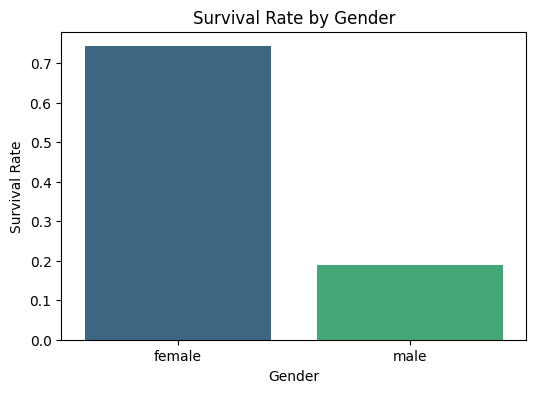

Survival rate by gender calculated and plotted.
      sex  survived
0  female  0.742038
1    male  0.188908


In [5]:
import matplotlib.pyplot as plt

survival_rate_by_gender = df_titanic.groupby('sex')['survived'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=survival_rate_by_gender, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

print("Survival rate by gender calculated and plotted.")
print(survival_rate_by_gender)

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning `hue` in `seaborn.barplot`. To address this and prevent future deprecation issues, I will explicitly set `hue='sex'` and `legend=False` as suggested by the warning.



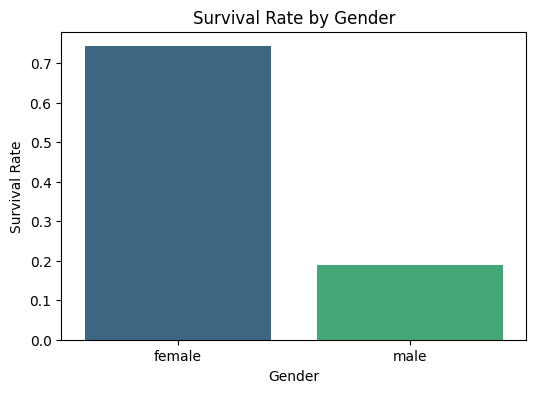

Survival rate by gender calculated and plotted.
      sex  survived
0  female  0.742038
1    male  0.188908


In [6]:
import matplotlib.pyplot as plt

survival_rate_by_gender = df_titanic.groupby('sex')['survived'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='survived', data=survival_rate_by_gender, palette='viridis', hue='sex', legend=False)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

print("Survival rate by gender calculated and plotted.")
print(survival_rate_by_gender)

**Reasoning**:
The previous step successfully generated a bar plot for survival rate by gender. Now, I will proceed to the next visualization as per the main task, which is to create a bar plot showing the survival rate by passenger class. This involves grouping the DataFrame by 'pclass' and calculating the mean survival rate, then plotting it.



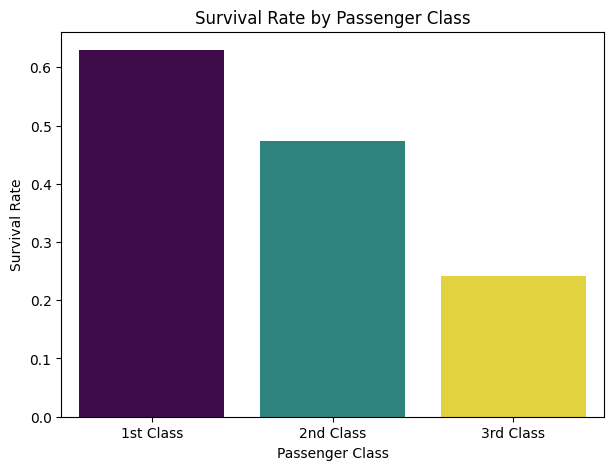

Survival rate by passenger class calculated and plotted.
   pclass  survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [7]:
survival_rate_by_class = df_titanic.groupby('pclass')['survived'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='pclass', y='survived', data=survival_rate_by_class, palette='viridis', hue='pclass', legend=False)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

print("Survival rate by passenger class calculated and plotted.")
print(survival_rate_by_class)

**Reasoning**:
The previous steps covered survival rates by gender and passenger class. The next visualization required by the main task is the age distribution for survivors vs. non-survivors. I will use histograms or kernel density plots to compare the age distributions for these two groups.



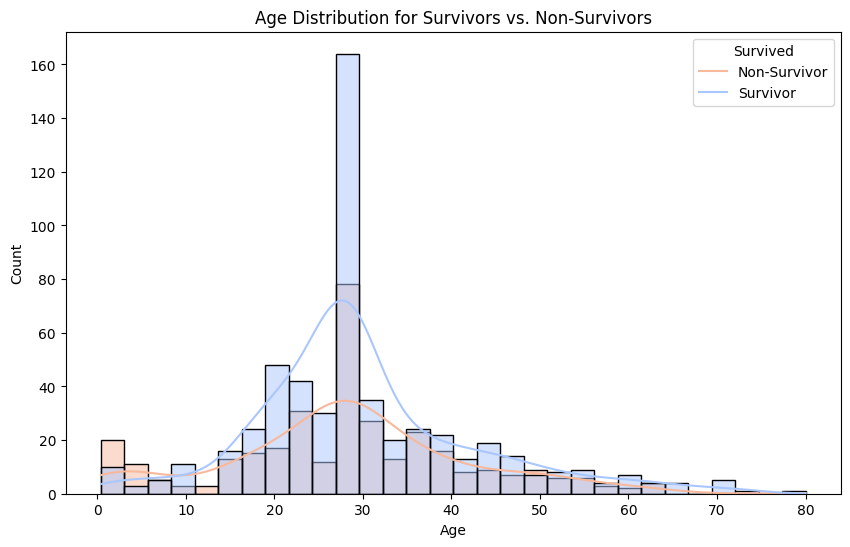

Age distribution for survivors vs. non-survivors plotted.


In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanic, x='age', hue='survived', kde=True, bins=30, palette='coolwarm')
plt.title('Age Distribution for Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Non-Survivor', 'Survivor'])
plt.show()

print("Age distribution for survivors vs. non-survivors plotted.")

**Reasoning**:
The previous steps have generated visualizations for survival rate by gender, survival rate by passenger class, and age distribution for survivors vs. non-survivors. The last visualization required by the main task is the survival rate by both passenger class and gender. I will create a bar plot for this using Seaborn.



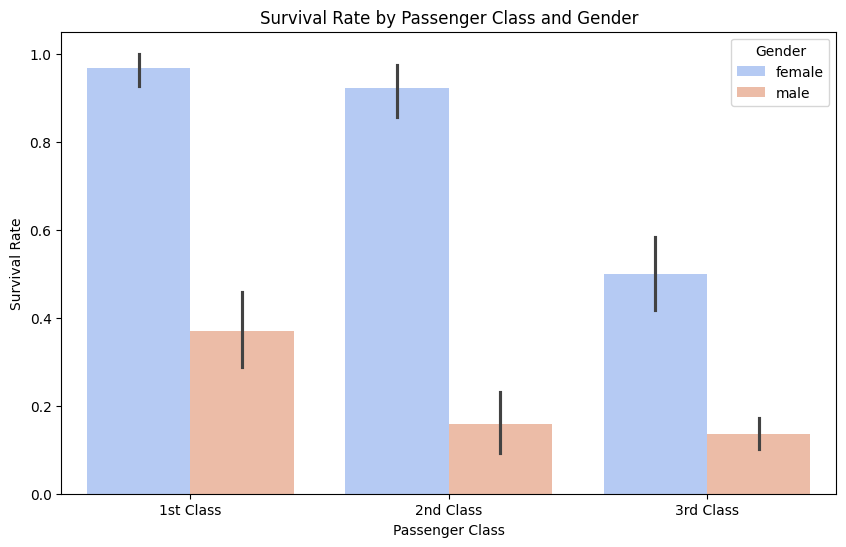

Survival rate by passenger class and gender plotted.


In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=df_titanic, palette='coolwarm')
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Gender')
plt.show()

print("Survival rate by passenger class and gender plotted.")

## Summarize Key Insights

### Subtask:
Analyze the generated visualizations and summarize the key insights regarding the relationships between passenger class, age, gender, and survival on the Titanic. Highlight significant trends and correlations observed.


### Key Insights from Titanic Survival Analysis

Based on the visualizations, several significant trends and correlations regarding survival on the Titanic can be observed:

1.  **Gender had the most significant impact on survival**: The 'Survival Rate by Gender' plot clearly showed that females had a substantially higher survival rate (approximately 74%) compared to males (approximately 19%). This indicates a strong "women and children first" protocol or priority during the evacuation.

2.  **Passenger Class also strongly influenced survival**: The 'Survival Rate by Passenger Class' plot revealed a clear hierarchy: 1st class passengers had the highest survival rate (approximately 63%), followed by 2nd class (approximately 47%), and then 3rd class passengers (approximately 24%). This suggests that social-economic status, which likely correlated with cabin location and access to lifeboats, played a crucial role in survival.

3.  **Age Distribution for Survivors vs. Non-Survivors**: The 'Age Distribution for Survivors vs. Non-Survivors' plot indicated that younger children (especially infants) had a relatively higher chance of survival compared to other age groups, aligning with the "children first" principle. For adults, the survival rate appeared to be higher for certain age ranges, but overall, non-survivors seemed to be more concentrated in younger adult age groups, while survivors were more evenly distributed across adult ages.

4.  **Combined effect of Passenger Class and Gender**: The 'Survival Rate by Passenger Class and Gender' plot confirmed that female passengers across all classes had a much higher survival rate than male passengers. However, even within genders, class was a factor: 1st class females had a near-perfect survival rate, which slightly decreased for 2nd and 3rd class females. Similarly, 1st class males had a better survival chance than 2nd or 3rd class males, though still significantly lower than any female group.

**Conclusion**: Gender was the most dominant factor influencing survival, with females having a much greater likelihood of surviving. Passenger class was the second most influential factor, indicating that socio-economic status played a vital role. Age, particularly for young children, also had a positive correlation with survival, but its overall impact was less pronounced than gender or class for the adult population.

## Final Task

### Subtask:
Provide a comprehensive summary of the analysis, discussing the main factors influencing survival on the Titanic based on the data and visualizations.


## Summary:

### Q&A
The analysis identified the main factors influencing survival on the Titanic as gender, passenger class, and to a lesser extent, age.

### Data Analysis Key Findings
*   **Gender had the most significant impact on survival**: Females exhibited a substantially higher survival rate of approximately 74.2% compared to males, who had a survival rate of about 18.9%.
*   **Passenger Class strongly influenced survival**: A clear hierarchy was observed, with 1st class passengers having the highest survival rate (approximately 63%), followed by 2nd class (approximately 47.3%), and then 3rd class passengers (approximately 24.2%).
*   **Age played a role, especially for children**: The age distribution showed that younger children, particularly infants, had a relatively higher chance of survival.
*   **Combined effect of Passenger Class and Gender**: Female passengers across all classes had significantly higher survival rates than male passengers. However, even within genders, class was a factor; 1st class females had a near-perfect survival rate, while 1st class males had a better chance than 2nd or 3rd class males, though still much lower than any female group.

### Insights or Next Steps
*   The findings strongly suggest that "women and children first" protocols were widely implemented, and socio-economic status (indicated by passenger class) significantly affected one's chances of survival.
*   Further analysis could explore the impact of other factors like embarkation point, family size, or fare paid, and investigate interactions between these variables to build a predictive model for survival.
